In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
index=["color","color_name","hex","R","G","B"]
csv = pd.read_csv('/content/drive/My Drive/colors.csv', names=index, header=None)

print(csv)

                    color             color_name      hex    R    G    B
0      air_force_blue_raf   Air Force Blue (Raf)  #5d8aa8   93  138  168
1     air_force_blue_usaf  Air Force Blue (Usaf)  #00308f    0   48  143
2    air_superiority_blue   Air Superiority Blue  #72a0c1  114  160  193
3         alabama_crimson        Alabama Crimson  #a32638  163   38   56
4              alice_blue             Alice Blue  #f0f8ff  240  248  255
..                    ...                    ...      ...  ...  ...  ...
860         yellow_orange          Yellow Orange  #ffae42  255  174   66
861        yellow_process       Yellow (Process)  #ffef00  255  239    0
862            yellow_ryb           Yellow (Ryb)  #fefe33  254  254   51
863                zaffre                 Zaffre  #0014a8    0   20  168
864     zinnwaldite_brown      Zinnwaldite Brown  #2c1608   44   22    8

[865 rows x 6 columns]


In [ ]:
print(csv['color_name'])

0       Air Force Blue (Raf)
1      Air Force Blue (Usaf)
2       Air Superiority Blue
3            Alabama Crimson
4                 Alice Blue
               ...          
860            Yellow Orange
861         Yellow (Process)
862             Yellow (Ryb)
863                   Zaffre
864        Zinnwaldite Brown
Name: color_name, Length: 865, dtype: object


The type of this input is <class 'numpy.ndarray'>
Shape: (225, 224, 3)


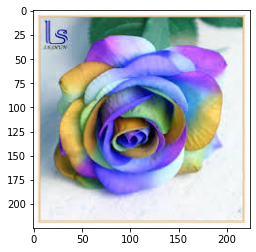

In [30]:
image = cv2.imread('/content/drive/My Drive/img3.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)


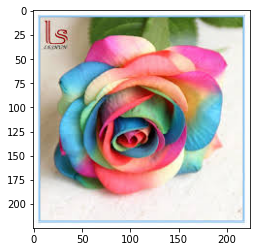

In [31]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

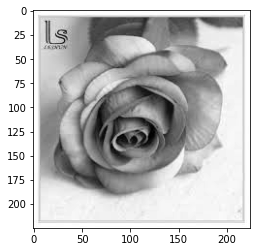

In [32]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

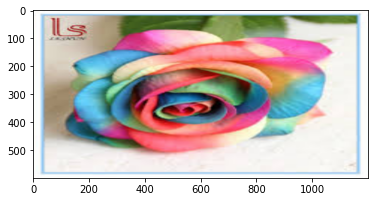

In [33]:

resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [34]:
def RGB2HEXADECIMAL(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


In [35]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [36]:
def get_colors(image, number_of_colors, show_chart):
  modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
  clf = KMeans(n_clusters = number_of_colors)
  labels = clf.fit_predict(modified_image)
  counts = Counter(labels)
  center_colors = clf.cluster_centers_
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB2HEXADECIMAL(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]

  if (show_chart):
      plt.figure(figsize = (8, 6))
      plt.pie(counts.values(), labels = hex_colors, colors = hex_colors,autopct='%1.1f%%',)
      plt.title("Color Classification")

  return rgb_colors



[array([ 97.20521186, 176.60711227, 204.11565597]),
 array([156.70858941, 155.94462753, 123.25094267]),
 array([237.04532545, 109.09861692, 127.44870581]),
 array([239.57239951, 236.17729114, 232.64643955]),
 array([72.81170443, 79.69862023, 59.55014615])]

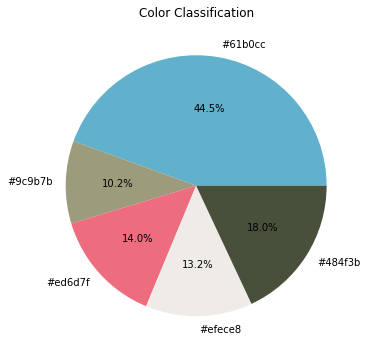

In [37]:
get_colors(get_image("/content/drive/My Drive/img3.jpg" ), 5, True)

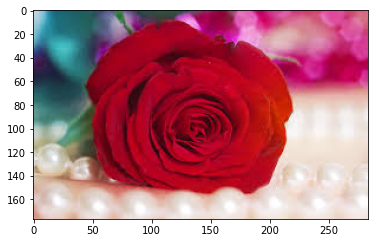

In [24]:
image = cv2.imread('/content/drive/My Drive/img4.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

[array([ 57.33250953, 101.90646346, 108.74104967]),
 array([105.44517602,   9.35314938,  26.79813511]),
 array([174.46779093,   8.24108585,  37.9978905 ]),
 array([232.10319981, 216.11951925, 210.33625735]),
 array([204.61860495, 101.25745758, 141.04476139])]

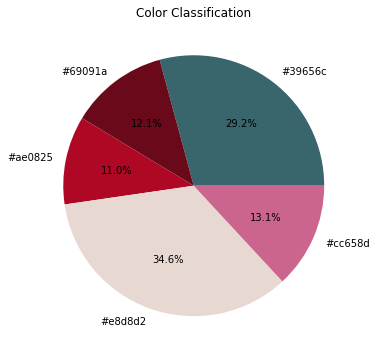

In [28]:
get_colors(get_image("/content/drive/My Drive/img4.jpg" ), 5, True)